Library Importation 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from google.colab.patches import cv2_imshow
from numpy.fft import fft, ifft
import skimage
from skimage import restoration
import scipy
from scipy.fftpack import fftn, ifftn
from astropy.io import fits
from scipy.ndimage import gaussian_filter as gf

Image Reading and Resizing

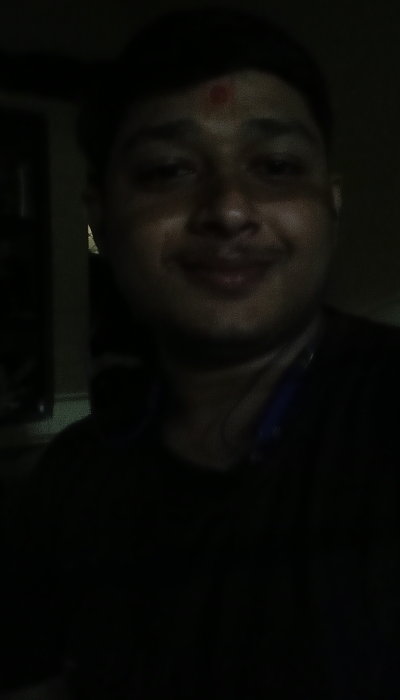

In [ ]:
img1 = cv2.imread("/content/drive/MyDrive/EE610-Assignments/IMG20220817194342.jpg")  #colored image 
img_1 = cv2.imread("/content/drive/MyDrive/EE610-Assignments/IMG20220817194342.jpg",0) #grayscale image

#resizing of grayscale image
img_1 = cv2.resize(img_1,(400,900))
img_1 = img_1[200:,:]
#resizing of colored image
img1 = cv2.resize(img1,(400,900))
img1 = img1[200:,:]
cv2_imshow(img1)

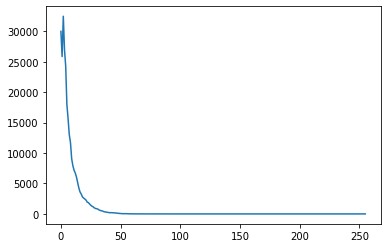

In [ ]:
img1h = cv2.calcHist([img1],[0],None,[256],[0,256])

# show the plotting graph of an image
plt.plot(img1h)
plt.show()

In [ ]:
#gaussian filter
gs = np.array([[1,4,6,4,1],[4,16,24,26,4],[6,24,36,24,6],[4,16,24,26,4],[1,4,6,4,1]])/256


 Denoising Using ```fastNlMeansDenoisingColored ``` Library and its removes noise but do extra smoothing to the image which is undesirable


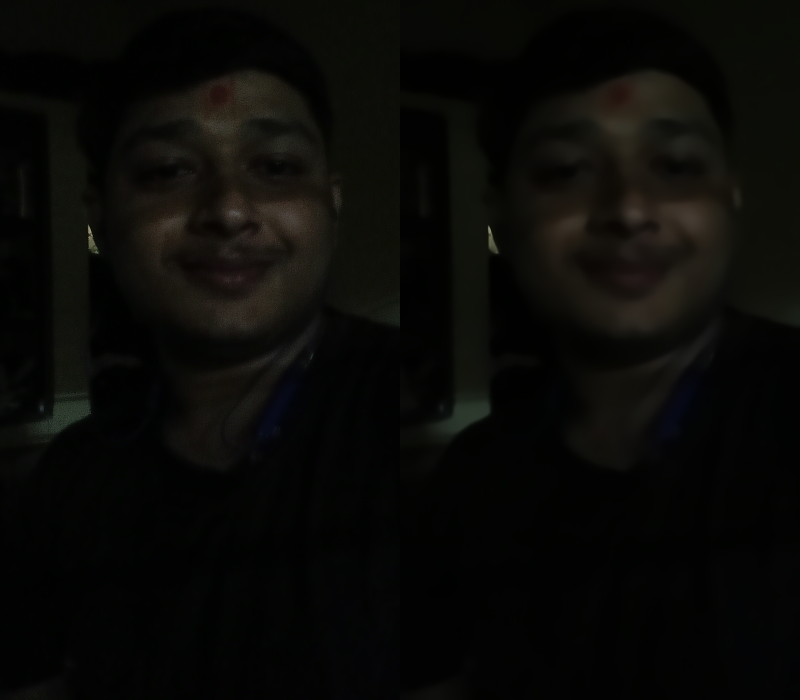

In [ ]:

img = img1.copy()  #original Image
dst = cv2.fastNlMeansDenoisingColored(img,None,20,20,7,15)
display = np.hstack((img , dst))   #to show the photos side by side
cv2_imshow(display)

We are now Using Unsharp Masking Method to improve Sharpening to image.

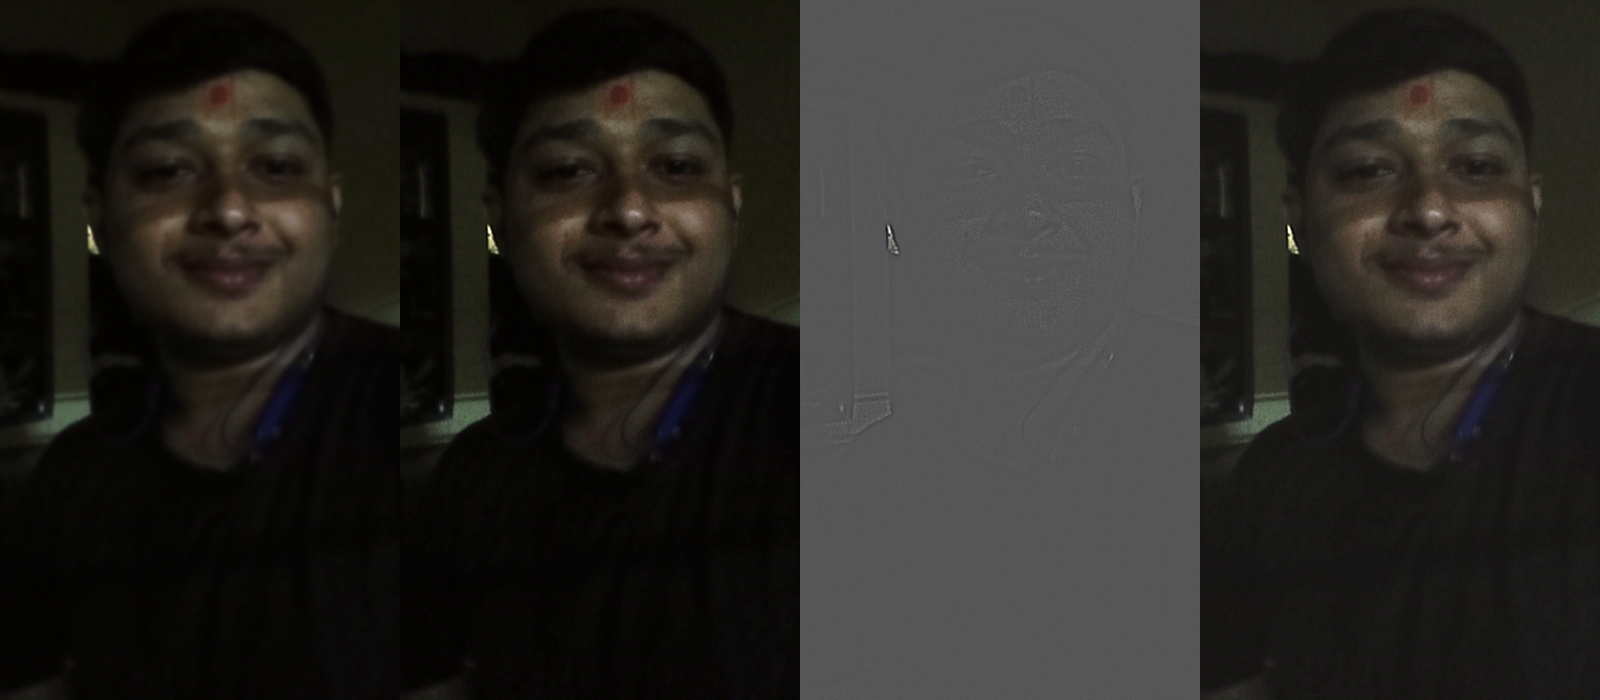

In [ ]:
fil1 = np.ones((5,5))/25
img2 = cv2.filter2D(img1,-1,gs)  #Gaussian Filter Application to the Img1(original Image)
img2[:,:,2] = img2[:,:,2]+2  #Improving red color in image , i felt it lookes nice
img2 = img2*1.7


kernel1 = -1*np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])  #Sharpen Filter using upsharp masking
kernel2 = -1*np.array([[0,-1,0],[-1,8,-1],[0,-1,0]])  #Other sharpen filter to check sharpening effect
kernel3 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]) #Other sharpen filter to check sharpening effect

img4 = cv2.filter2D(img2,-1,kernel1*-1)   #kernel-1 application 

img4v = cv2.filter2D(img2,-1,kernel1)
img6 = cv2.filter2D(img2,-1,kernel3)  #kernel2 application 

#Application of unsharpmasking
img6 = img6 - np.min(img6)  
img6 = img6*(255.0/np.max(img6))
sharpened = (img2/255 + img6/255)*255
sharpened = sharpened - np.min(sharpened)*1.5
sharpened = sharpened * (255.0/np.max(sharpened))


# print(kernel2)
sharp = np.hstack((img2,img4,img6,sharpened*1.5))
cv2_imshow(sharp)

The Fourth Image in above looks good

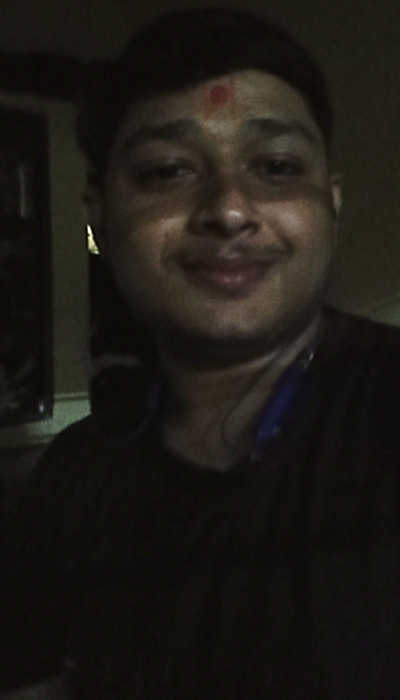

Looks Fine !!


In [ ]:
#trying to enhance more details into the image
#using detailenhance library

gs = np.array([[1,4,6,4,1],[4,16,24,26,4],[6,24,36,24,6],[4,16,24,26,4],[1,4,6,4,1]])/256
dst1 = cv2.detailEnhance(img2, sigma_s=1.7, sigma_r=100)
try2 = np.hstack((sharpened*1.5+dst1)/2)  #weitagted sum of image
cv2_imshow((sharpened*1.5+dst1)/2)

print("Looks Fine !!")

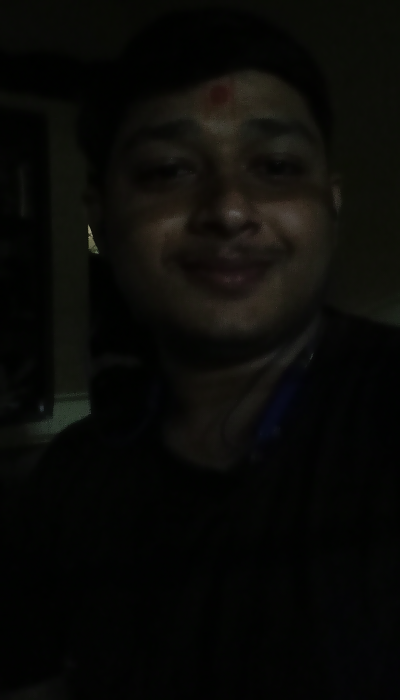

In [ ]:
#Trying Different Filters to enhance image

img3 = cv2.bilateralFilter(img1,5,12,6)
cv2_imshow(img3)

Trying Different filter combination, Image Combination to improve results

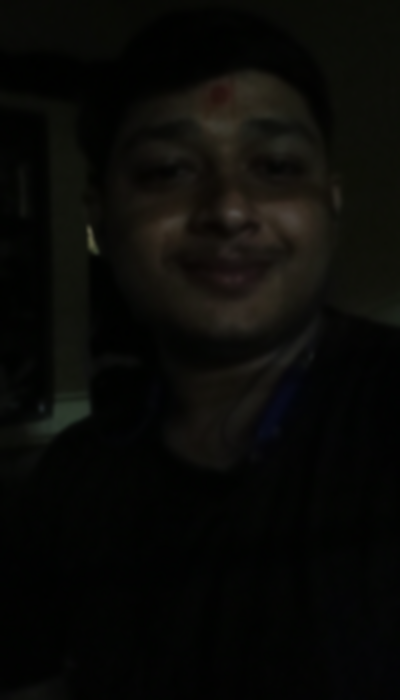

In [ ]:
img5 = cv2.GaussianBlur(img1,(7,7),2)
cv2_imshow(img5)

In [ ]:
#Different composition of image added togather by weitage of sum = 1
imgs1 = cv2.add(img4*1.5,img5*-0.5)
imgs2 = cv2.add(img4*3.5,img5*-2.5)
imgs3 = np.add(img4*5,img5*-4)
imgtry = np.add(imgs1*1.2,sharpened*0.2)


cv2_imshow(imgtry*0.8)
cv2_imshow(imgs1)
cv2_imshow(imgs2)
cv2_imshow(imgs3)

try1 = cv2.detailEnhance(imgs1, sigma_s=1.7, sigma_r=0.15)
cv2_imshow(try1)
try2 = cv2.detailEnhance(imgtry, sigma_s=0.8, sigma_r=0.15)
cv2_imshow(try2)

Output hidden; open in https://colab.research.google.com to view.

First 2 images(name of image - imgtry) in above operations looks very nice and rest are brighen so they are removing feeling of night from the image and adding some extra noise too.

Histogram methods

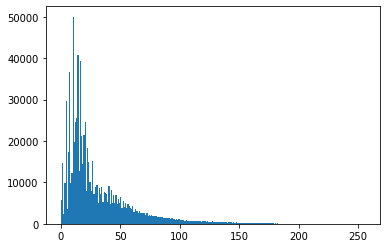

In [ ]:

import cv2
from matplotlib import pyplot as plt
img = imgtry.copy()
  
#histogram of imgtry 
plt.hist(img.ravel(),256,[0,256])
plt.show()

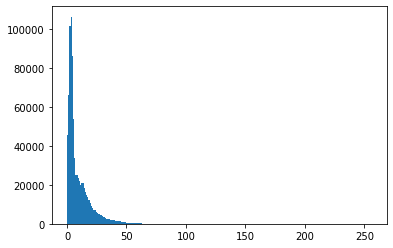

In [ ]:

  
#histogram of original image
plt.hist(img1.ravel(),256,[0,256])
plt.show()

#histogram having exponential shape

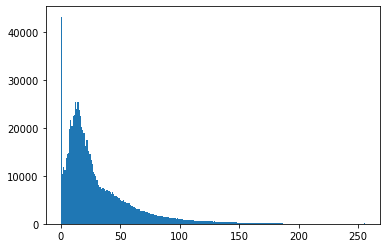

In [ ]:
plt.hist(try2.ravel(),256,[0,256])
plt.show()
#histogram of image try2
#we can see that intensities is quite more spread than original

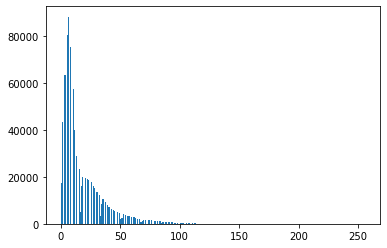

In [ ]:
plt.hist(img4.ravel(),256,[0,256])
plt.show()
#histogram of image img4

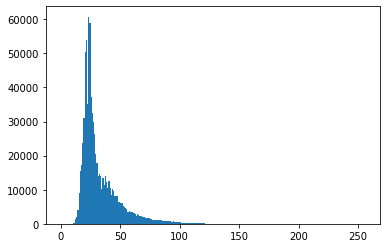

In [ ]:
sharpe = sharpened*1.5  #brightening sharpened with factor of 1.5
plt.hist(sharpe.ravel(),256,[0,256])
plt.show()

#histogram of image sharpe

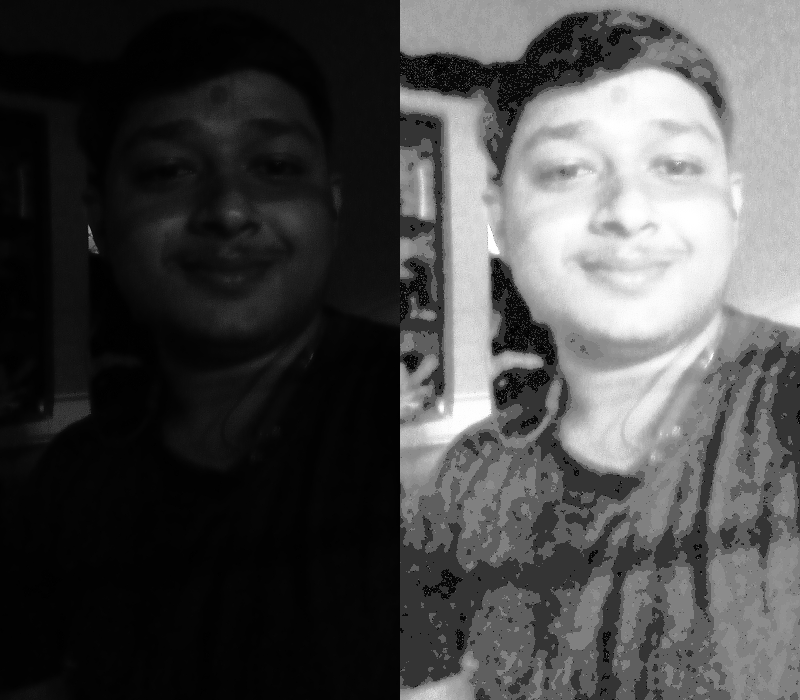

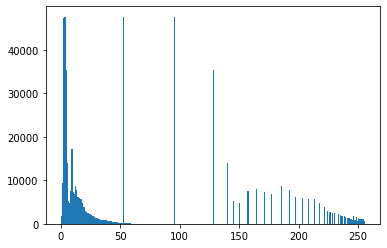

In [ ]:
#Using Histogram Equlization in grayscale image
#giving very poor result due to low contrast and unbalence image intensities

img = img_1.copy()
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2_imshow(res)

plt.hist(res.ravel(),256,[0,256])
plt.show()
